In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r"C:\Users\ROODRA\CU\Brain\brain_tumor_dataset\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\ROODRA\CU\Brain\brain_tumor_dataset\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
model.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
y_train.shape

(111, 2)

In [10]:
Model1 = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 10s 2s/step - loss: 20.7410 - accuracy: 0.5856 - val_loss: 77.7775 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 16.3209 - accuracy: 0.7027 - val_loss: 20.7239 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 8.3418 - accuracy: 0.7207 - val_loss: 42.7568 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 5.0236 - accuracy: 0.8198 - val_loss: 36.8653 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 3.5245 - accuracy: 0.8649 - val_loss: 15.9131 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 2.3406 - accuracy: 0.9369 - val_loss: 11.3050 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 2.9275 - accuracy: 0.8829 - val_loss: 11.3764 - val_accuracy: 0.7857
Epoch 8/30
3/3 [===============

In [11]:
#trained model, 'x_test', 'y_test' are test data
evaluation_results = model.evaluate(x_test, y_test)

# 'evaluate' method returns a list of metrics, including accuracy
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

1/1 [==============================] - 0s 258ms/step - loss: 8.0599 - accuracy: 0.7857
Model Accuracy on Test Set: 78.57%


In [19]:
def names(number):
    if number==0:
        return 'This person have Tumor'
    else:
        return 'This Person doesnt have tumor'

100.0% Accuracy This Person doesnt have tumor


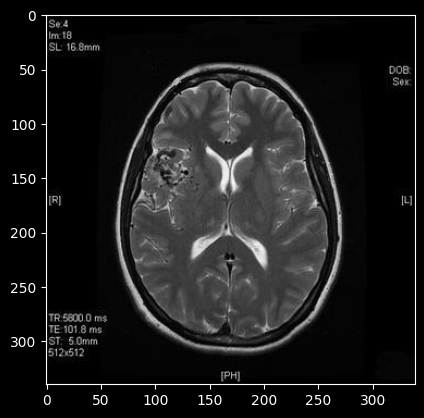

In [20]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\ROODRA\CU\Brain\brain_tumor_dataset\no\No14.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Accuracy ' + names(classification))

100.0% Accuracy This person have Tumor


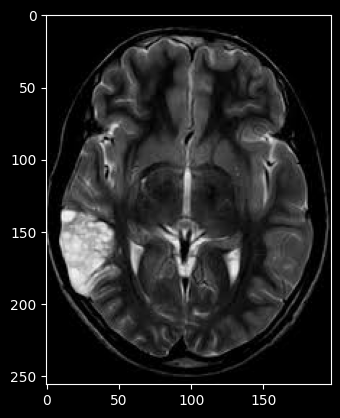

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\ROODRA\CU\Brain\brain_tumor_dataset\yes\Y252.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Accuracy ' + names(classification))

82.21670389175415% Accuracy This person have Tumor


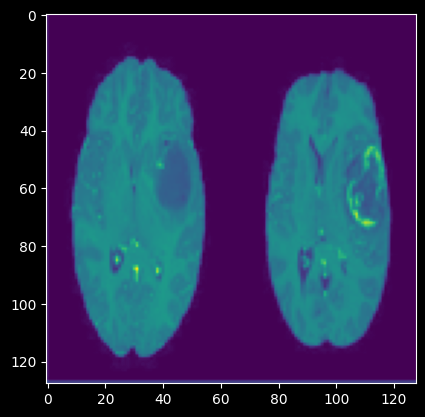

In [22]:
# Open and resize the image
img = Image.open(r"C:\Users\ROODRA\CU\Brain\41598_2022_5572_Fig1_HTML.jpg")
img = img.resize((128, 128))

# Convert grayscale image to RGB
img_rgb = img.convert("RGB")

# Convert image to numpy array
x = np.array(img_rgb)

# Reshape the array to match the model's input shape
x = x.reshape(1, 128, 128, 3)

# Make prediction on the image
res = model.predict_on_batch(x)

# Get the predicted class
classification = np.argmax(res)

imshow(img)

print(str(res[0][classification]*100) + '% Accuracy ' + names(classification))